In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
import os

In [3]:
ps_files = os.listdir(os.path.join(os.getcwd(),'Datasets','Abnormal'))
ps_files

['abnormal01_aaaaabdo_s003_t000.edf.csv',
 'abnormal02_aaaaaddm_s006_t000.edf.csv',
 'abnormal03_aaaaadeu_s002_t000.edf.csv',
 'abnormal04_aaaaadkb_s002_t000.edf.csv',
 'abnormal06_aaaaagsc_s006_t001.edf.csv',
 'abnormal07_aaaaagvx_s002_t000.edf.csv',
 'abnormal08_aaaaagvx_s003_t001.edf.csv',
 'abnormal_aaaaabuv_s002_t000.edf.csv',
 'abnornal05_aaaaagsc_s003_t001.edf.csv']

In [4]:
ng_files = os.listdir(os.path.join(os.getcwd(),'Datasets','Normal'))
ng_files

['normal01_aaaaacad_s003_t000.edf.csv',
 'normal02_aaaaacby_s004_t000.edf.csv',
 'normal03_aaaaadjk_s002_t000.edf.csv',
 'normal04_aaaaadsm_s002_t001.edf.csv',
 'normal_aaaaaayx_s002_t000.edf.csv']

In [9]:

abnormal_dfs = [pd.read_csv(f"{os.path.join(os.getcwd(),'Datasets','Abnormal',ps_files[i])}") for i in range(0, 8)]
normal_dfs = [pd.read_csv(f"{os.path.join(os.getcwd(),'Datasets','Normal',ng_files[i])}") for i in range(0, 4)]
train_df = pd.concat(abnormal_dfs + normal_dfs)

train_df['label'] = [1] * (len(train_df) - len(normal_dfs[0])*4) + [0] * (len(normal_dfs[0])*4)

X = train_df.drop(columns=['label'])
y = train_df['label']

X = X.fillna(X.mean())
X = X.dropna()
y = y.loc[X.index] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y[:len(X)]

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

Accuracy: 0.6438676942838792
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.26      0.32    251600
           1       0.70      0.83      0.76    526900

    accuracy                           0.64    778500
   macro avg       0.56      0.54      0.54    778500
weighted avg       0.61      0.64      0.62    778500



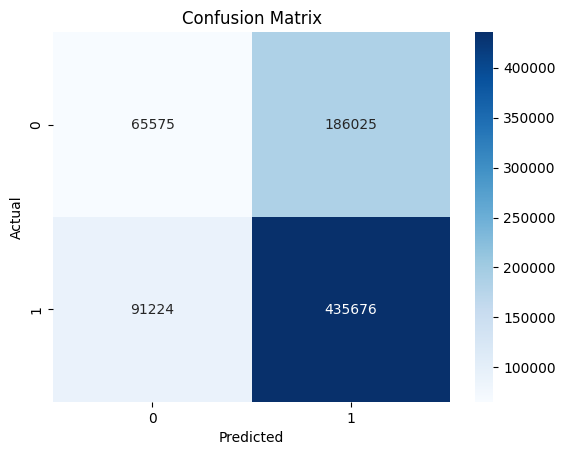

R² Score: -0.6281325913847715


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Plots\\KNN_confusion_matrix.png', bbox_inches='tight', dpi=500)
plt.show()

# R² Score
r2 = r2_score(y_val, y_pred)
print("R² Score:", r2)


Accuracy: 0.6438676942838792
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.26      0.32    251600
           1       0.70      0.83      0.76    526900

    accuracy                           0.64    778500
   macro avg       0.56      0.54      0.54    778500
weighted avg       0.61      0.64      0.62    778500

R² Score: -0.6281325913847715